In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
data = pd.read_csv("housing.csv")

In [30]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [44]:
data.dropna(inplace=True)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [34]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [35]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [36]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [54]:
train_data = x_train.join(y_train)

In [55]:
train_data.drop(columns=['ocean_proximity'], inplace=True)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
14063,-117.13,32.75,20.0,2271.0,602.0,992.0,520.0,2.2599,157600.0
17097,-122.23,37.46,26.0,4670.0,1039.0,2103.0,933.0,4.4167,333800.0
17229,-119.69,34.44,41.0,1989.0,271.0,666.0,269.0,6.8406,500001.0
14960,-116.92,32.76,9.0,1859.0,307.0,947.0,304.0,5.9202,181300.0
7624,-118.26,33.85,24.0,9071.0,1335.0,4558.0,1327.0,5.5420,197500.0
...,...,...,...,...,...,...,...,...,...
18212,-122.06,37.38,20.0,3401.0,768.0,1497.0,747.0,4.2188,500001.0
19287,-122.77,38.39,35.0,2611.0,475.0,1293.0,463.0,2.7500,197500.0
18654,-121.96,36.98,16.0,4907.0,1117.0,2265.0,1048.0,2.6757,229200.0
15405,-117.24,33.23,21.0,1718.0,308.0,1194.0,312.0,3.4359,150900.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

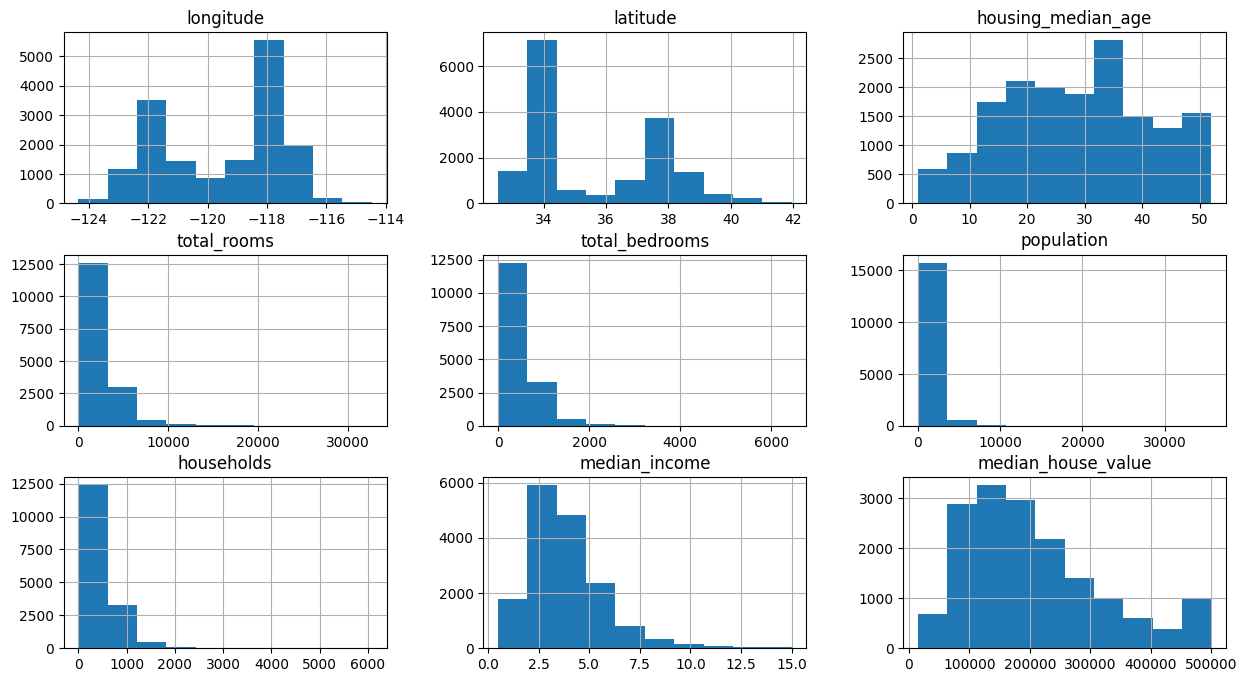

In [56]:
train_data.hist(figsize=(15, 8))

In [57]:
train_data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924284,-0.109700,0.045546,0.069783,0.097345,0.055217,-0.013203,-0.041747
latitude,-0.924284,1.000000,0.013873,-0.037676,-0.068285,-0.108314,-0.072529,-0.082878,-0.148135
housing_median_age,-0.109700,0.013873,1.000000,-0.359713,-0.317485,-0.289170,-0.298821,-0.117538,0.105007
total_rooms,0.045546,-0.037676,-0.359713,1.000000,0.930714,0.855186,0.917886,0.193891,0.132115
total_bedrooms,0.069783,-0.068285,-0.317485,0.930714,1.000000,0.873153,0.977700,-0.011017,0.049305
population,0.097345,-0.108314,-0.289170,0.855186,0.873153,1.000000,0.905169,0.004647,-0.025180
households,0.055217,-0.072529,-0.298821,0.917886,0.977700,0.905169,1.000000,0.010816,0.064910
median_income,-0.013203,-0.082878,-0.117538,0.193891,-0.011017,0.004647,0.010816,1.000000,0.685989
median_house_value,-0.041747,-0.148135,0.105007,0.132115,0.049305,-0.025180,0.064910,0.685989,1.000000


<Axes: >

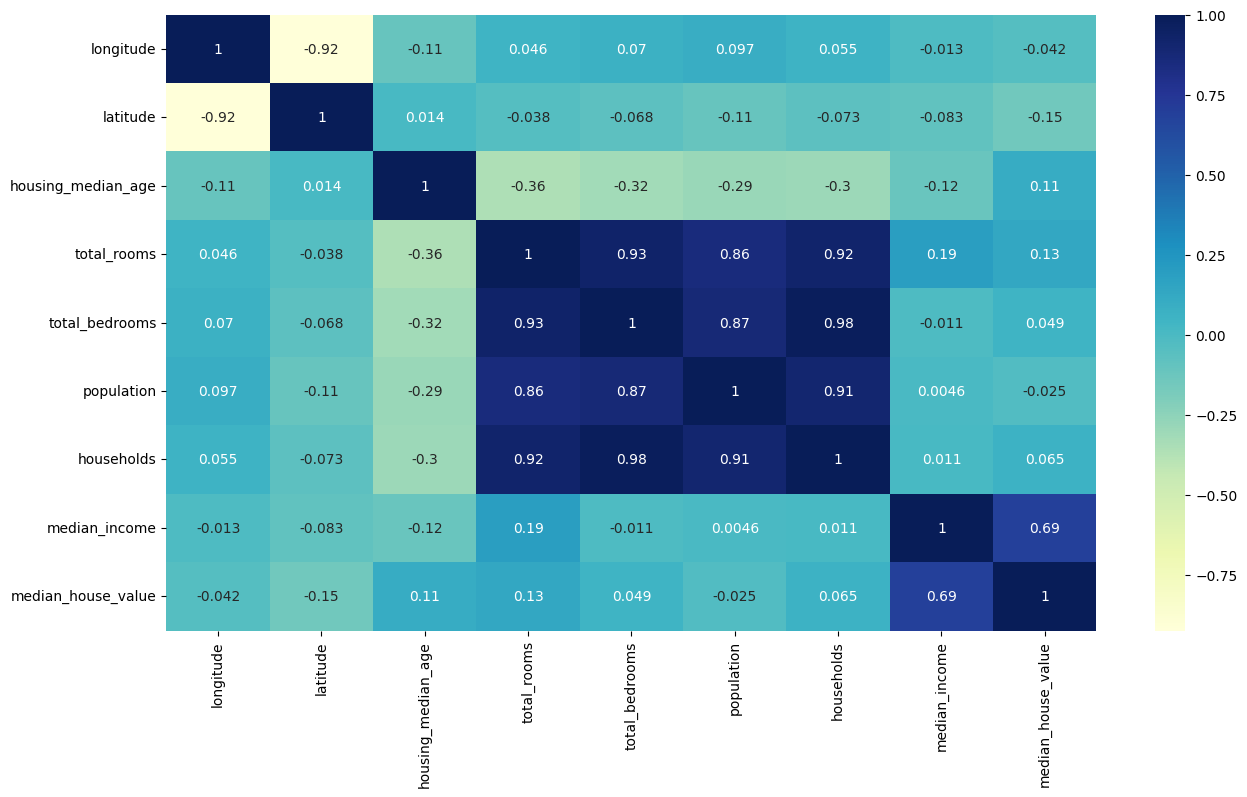

In [58]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')